# The Multiple_Filter object

In the [previous notebook](filter.ipynb) we looked at using the `Filter` object; now we will extend this to our `Multiple_Filter` object. This class simply holds a list of Filter objects, but makes loading these in via SVO much easier via its class methods. In addition, these filters are by default sorted from bluest to reddest based on their central wavelength, which reduces potential errors arising from manually ordering these.

We start by loading in all of the JWST filters in two different ways:
1. By looping through all band names for each of the NIRCam and MIRI instruments, making an array of `Filter` objects pulled from the SVO individually.
1. Pull all bands from each JWST imaging instrument in one go and add these together.

In [1]:
# imports
import time
import matplotlib.pyplot as plt
from galfind import Filter, Multiple_Filter #, UVJ_Filters

__init__ imports took 0.6955788135528564s
Reading GALFIND config file from: /nvme/scratch/work/austind/GALFIND/galfind/../configs/galfind_config.ini


In [2]:
# Load in the filter objects

# time the load-in
start = time.time()

NIRCam_band_names = [
    "F070W", "F090W", "F115W", "F140M", "F150W", "F162M", "F164N", "F150W2",
    "F182M", "F187N", "F200W", "F210M", "F212N", "F250M", "F277W", "F300M",
    "F323N", "F322W2","F335M", "F356W", "F360M", "F405N", "F410M", "F430M",
    "F444W", "F460M", "F466N", "F470N", "F480M",
]
MIRI_band_names = [
    "F560W", "F770W", "F1000W", "F1065C", "F1140C", "F1130W", "F1280W",
    "F1500W", "F1550C", "F1800W", "F2100W", "F2300C", "F2550W",
]

JWST_filters = [Filter.from_SVO("JWST", "NIRCam", band_name) for band_name in NIRCam_band_names] + [Filter.from_SVO("JWST", "MIRI", band_name) for band_name in MIRI_band_names]
JWST_multi_filter_obj_1 = Multiple_Filter(JWST_filters)
end = time.time()
print(f"Time to load in JWST filters using method 1: {end - start}s")

Time to load in JWST filters using method 1: 1.0311617851257324s


In [3]:
# load all JWST filters
start = time.time()
JWST_multi_filter_obj_2 = Multiple_Filter.from_facility("JWST")
end = time.time()
print(f"Time to load in JWST filters using method 2: {end - start}s")
# confirm that these two methods are equivalent
assert JWST_multi_filter_obj_1 == JWST_multi_filter_obj_2

Time to load in JWST filters using method 2: 0.9306149482727051s


Apart from (hopefully) being slightly faster, the major advantage of method 2 is that it requires no prior knowledge of which bands are included in each imaging instrument. As with the `Filter` object, the `Multiple_Filter` class also has a `plot()` method which iteratively calls the `Filter.plot()` method. Let's try using this now.

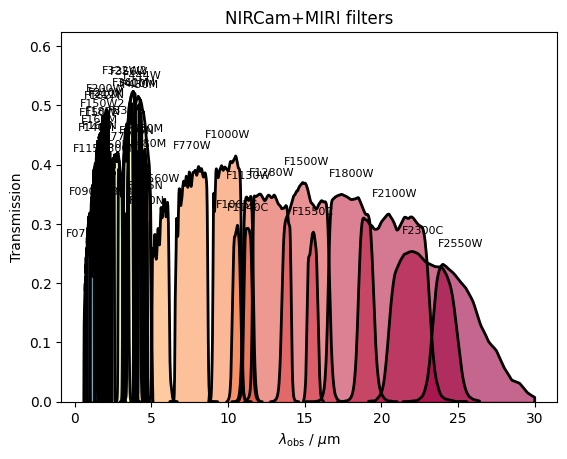

In [4]:
# plot the filters
fig, ax = plt.subplots()
JWST_multi_filter_obj_1.plot(ax, show = True)

It is pretty obvious from the above plot that this can get busy pretty quickly. Let's try plotting just the NIRCam bands.

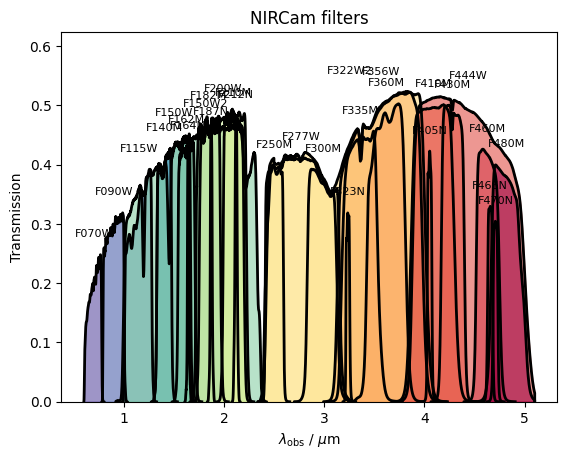

In [5]:
# load and plot the NIRCam filters
NIRCam_filt = Multiple_Filter.from_instrument("NIRCam")
# plot the filters
fig, ax = plt.subplots()
NIRCam_filt.plot(ax, show = True)

This is probably still a little too busy. We could try plotting just the JWST/NIRCam wide bands.

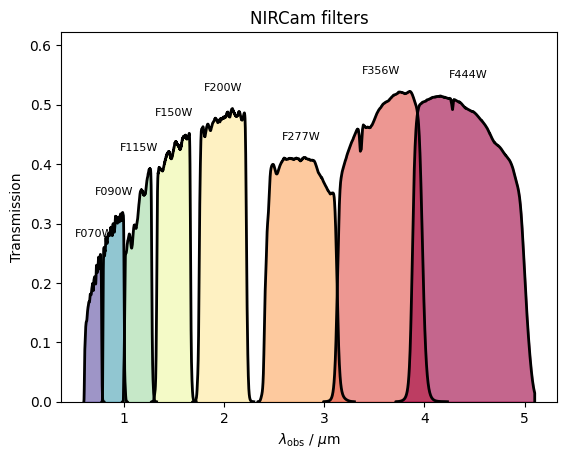

In [6]:
# load and plot the NIRCam wideband filters
NIRCam_widebands = Multiple_Filter.from_instrument("NIRCam", keep_suffix = "W")
fig, ax = plt.subplots()
NIRCam_widebands.plot(ax, show = True)

This definitely looks neater. Here we have made use of the 'keep_suffix' argument of `Multiple_Filter.from_instrument()` which keeps only those bands with a name ending with this string. This can also be useful to, for example, load in only the available medium bands for a particular instrument/facility.

Let's now plot the standard 8 JWST/NIRCam filters used in many cycle 1 large programs e.g. in the [PEARLS](https://sites.google.com/view/jwstpearls) imaging dataset. To do this we could create a brand new `Multiple_Filter` object as before, but since we have already loaded in most of the `Filter` objects from SVO, we will simply use the overloaded `-` operator to remove the less sensitive F070W filter and the overloaded `+` operator to load the F410M filter. When adding or removing bands from the `Multiple_Filter` object, either a string representation or a `Filter` object can be used.

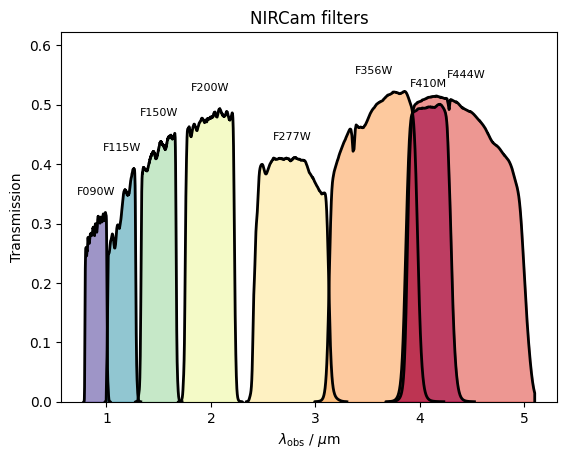

In [7]:
f410m = Filter.from_SVO("JWST", "NIRCam", "F410M")

NIRCam_widebands_plus_f410m = NIRCam_widebands + f410m
PEARLS_filters = NIRCam_widebands_plus_f410m - "F070W"

fig, ax = plt.subplots()
PEARLS_filters.plot(ax, show = True)

In the JOF example given for this documentation, we have an instrument that includes filters from HST/ACS_WFC (Hubble's Advanced Camera for Surveys Wide Field Camera). Let's have a look at using the final available class method to load these in, as well as have a little play with the multiple different ways that this filterset can be generated. To do this, we will again make use of the overloaded `+`/`-` operators, showing their full range of functionality.

In [8]:
# Method 1: Load in the filters showcasing features
ACS_WFC_NIRCam_wideband_filters = Multiple_Filter.from_instruments(["ACS_WFC", "NIRCam"], excl_bands = ["HST/ACS_WFC.F475W", "f070W"], keep_suffix = ["W"])
NIRCam_medium_bands = Multiple_Filter.from_instrument("NIRCam", excl_bands = ["f140M", "JWST/NIRCam.F360M", "F430m", Filter.from_SVO("JWST", "NIRCam", "F460M"), "JWST/NIRCam/F480M"], keep_suffix = "M")
JOF_filters_1 = ACS_WFC_NIRCam_wideband_filters + [NIRCam_medium_bands, "F850LP"] - ["f555W", Filter.from_SVO("HST", "ACS_WFC", "F625W")]

# Method 2: Load in the filters more directly
JOF_ACS_WFC_band_names = [
    "F435W", "F606W", "F775W", "F814W", "F850LP"
]
JOF_NIRCam_band_names = [
    "F090W", "F115W", "F150W", "F162M", "F182M", "F200W", "F210M", 
    "F250M", "F277W", "F300M", "F335M", "F356W", "F410M", "F444W"
]
JOF_filters_2 = Multiple_Filter([Filter.from_SVO("HST", "ACS_WFC", band_name) for band_name in JOF_ACS_WFC_band_names] \
    + [Filter.from_SVO("JWST", "NIRCam", band_name) for band_name in JOF_NIRCam_band_names])

# prove that these two methods are equivalent
if JOF_filters_1 == JOF_filters_2:
    print("The two methods of loading in the JOF filters are equivalent.\n")
else:
    print("The two methods of loading in the JOF filters are not equivalent.\n")

# print the Multiple_Filter object
print(JOF_filters_1)

The two methods of loading in the JOF filters are not equivalent.

****************************************
MULTIPLE_FILTER
****************************************
FACILITY: HST
INSTRUMENT: ACS_WFC
FILTERS: ['F435W', 'F606W', 'F775W', 'F814W', 'F850LP']
----------
FACILITY: JWST
INSTRUMENT: NIRCam
FILTERS: ['F090W', 'F115W', 'F150W', 'F200W', 'F277W', 'F356W', 'F444W', 'F162M', 'F182M', 'F210M', 'F250M', 'F300M', 'F335M', 'F410M']
****************************************



Excellent! The above shows the functionality of both `excl_bands` and `keep_suffix` which can be used in any `Multiple_Filter` class method. These accept types including `str`, `Filter`, `Multiple_Filter` as well as any mixed type list containing these. Strings denoting filter names can either include the facility and instrument or not, where the facility and instrument must be separated by a `/` and the instrument and filter name separated by either a `/` or `.`. In addition, each string input band will be recognized if either lower, upper, or mixed case.

In the [next notebook](instrument_object.ipynb), we will have a look at the `Instrument` and `Facility` objects stored inside each `Filter` object. These are being using behind the scenes in this notebook but now we will look explicitly at their functionality.